In [87]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Setup the 2006 dataframe

In [35]:
six = pd.read_table("NSDUH_2006_Tab.tsv",sep='\t', header = 0, index_col = 0, low_memory=False)

Create the 2006 Class Variable

In [36]:
six["COMB"] = (
    six["PROCODNP"]
    +six["OXYCODP2"]
    +six["HYDCODOP"]
    +six["TRAMADP"])
six["CLASS"] = 0
six.loc[(six["COMB"]>0) & (six["ANLYR"]==1),"CLASS"]=1
six.loc[(six["HERYR"]==1) | (six["OXYYR"]==1),"CLASS"]=1

Select the fields to study 2006 current co-incident drug use

In [37]:

drug_use2006 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALYR","INHYR","TRQYR","STMYR",
            "MTHYR","SEDYR","PSYYR2","CLASS"]

Select the fields to study 2006 Demographic effects

In [38]:
#demogr = [""]

In [39]:
six_otherdrug = six.loc[six["CATAG3"]==4,drug_use2006]

In [40]:
six_otherdrug.head()

,TOBYR,ALCYR,MRJYR,COCYR,CRKYR,HALYR,INHYR,TRQYR,STMYR,MTHYR,SEDYR,PSYYR2,CLASS
QUESTID2,,,,,,,,,,,,,
76775602,0,0,0,0,0,0,0,0,0,0,0,1,1
79748602,0,1,0,0,0,0,0,0,0,0,0,0,0
66270602,0,1,0,0,0,0,0,0,0,0,0,0,0
32480602,1,1,0,0,0,0,0,0,0,0,0,0,0
40722602,1,1,0,0,0,0,0,0,0,0,0,0,0


2021 - setup data frame, create CLASS variable, select certain fields for certain studies

In [41]:
tw1 = pd.read_table(
    "NSDUH_2021_Tab.txt",
    sep='\t', 
    header = 0, 
    index_col = 0, 
    low_memory=False)

In [42]:
tw1["CLASS"] = tw1["OPIANYYR"]

In [46]:

drug_use2021 = ["TOBYR","ALCYR","MRJYR","COCYR","CRKYR","HALLUCYR","INHALYR","TRQANYYR","STMANYYR",
            "METHAMYR","SEDANYYR","PSYANYYR","CLASS"]

In [47]:
tw1_otherdrug = tw1.loc[tw1["CATAG3"]==4,drug_use2021]

In [48]:
tw1_otherdrug.head()

,TOBYR,ALCYR,MRJYR,COCYR,CRKYR,HALLUCYR,INHALYR,TRQANYYR,STMANYYR,METHAMYR,SEDANYYR,PSYANYYR,CLASS
QUESTID2,,,,,,,,,,,,,
10002722,1,0,1,0,0,0,0,0,0,0,0,0,0
10004796,0,1,0,0,0,0,0,0,1,0,0,1,0
10007045,0,1,0,0,0,0,0,1,0,0,0,1,1
10008166,0,1,0,0,0,0,0,0,0,0,0,0,0
10009495,0,1,0,0,0,0,0,0,0,0,1,1,0


ANALYSIS OF 2006 DATA

In [82]:
six_pop_size = len(six_otherdrug)

In [83]:
six_opium_user = len(six_otherdrug[six_otherdrug["CLASS"]==1])

In [88]:
pct_drug_coinc_2006 = [
    len(six_otherdrug[(six_otherdrug["CLASS"]==1) 
        & (six_otherdrug[x]==1)])/six_opium_user 
    for x in drug_use2006[0:12]]

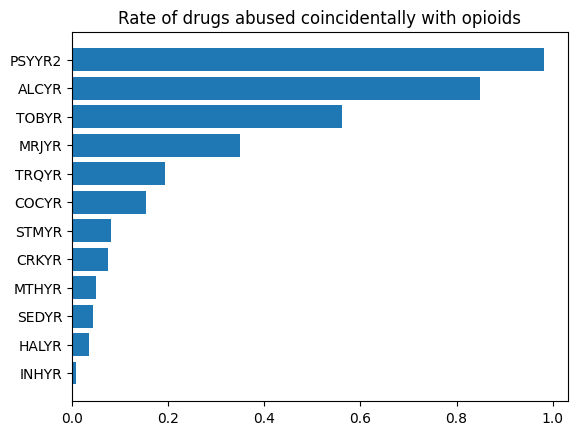

In [107]:
plt.barh(list(np.array(drug_use2006)[np.argsort(pct_drug_coinc_2006)]), 
         list(np.array(pct_drug_coinc_2006)[np.argsort(pct_drug_coinc_2006)]))
plt.title("2006 Rate of drugs abused coincidentally with opioids")
plt.show()

In [119]:
#make chart showing drug use of overall 35-49y/o population
len(six_otherdrug[six_otherdrug["ALCYR"]==1])/six_pop_size

0.7542074363992172

Analysis of 2021 Data

In [110]:
tw1_pop_size = len(tw1_otherdrug) 

In [111]:
tw1_opium_user = len(tw1_otherdrug[tw1_otherdrug["CLASS"]==1])

In [112]:
pct_drug_coinc_2021 = [
    len(tw1_otherdrug[(tw1_otherdrug["CLASS"]==1) 
        & (tw1_otherdrug[x]==1)])/tw1_opium_user 
    for x in drug_use2021[0:12]]

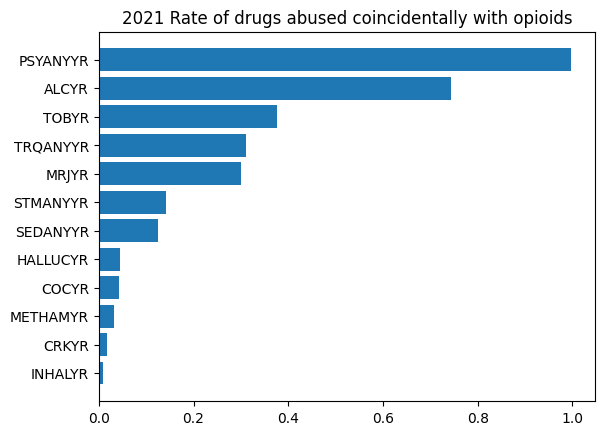

In [113]:
plt.barh(list(np.array(drug_use2021)[np.argsort(pct_drug_coinc_2021)]), 
         list(np.array(pct_drug_coinc_2021)[np.argsort(pct_drug_coinc_2021)]))
plt.title("2021 Rate of drugs abused coincidentally with opioids")
plt.show()

In [127]:
pct_druguse_overall_2021 = [
    len(tw1_otherdrug[(tw1_otherdrug[x]==1)])/tw1_pop_size 
    for x in drug_use2021]

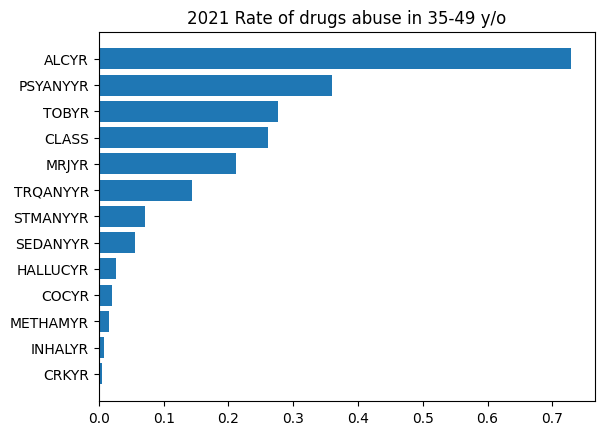

In [129]:
plt.barh(list(np.array(drug_use2021)[np.argsort(pct_druguse_overall_2021)]), 
         list(np.array(pct_druguse_overall_2021)[np.argsort(pct_druguse_overall_2021)]))
plt.title("2021 Rate of drugs abuse in 35-49 y/o")
plt.show()